# Exploring Programming work

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
font = { 'family': 'DejaVu Sans', 'weight': 'bold', 'size': 22 }
plt.rc('font', **font)

In [3]:
df_programs = pd.read_json('../../data/raw/programming.json')

In [4]:
# df_programs.head(2)

In [5]:
df_programs.date.dtype

dtype('<M8[ns]')

In [6]:
df_programs['module'].value_counts()

ca116    213680
Name: module, dtype: int64

In [7]:
'Unique users:', len(df_programs['user'].unique())

('Unique users:', 445)

In [8]:
'Unique tasks:', len(df_programs['task'].unique())

('Unique tasks:', 341)

In [9]:
df_programs['task'].value_counts().sort_values(ascending=False)[:10]

ex3-strip-zeros.py        2830
ex2-first-negative.py     2176
ex2-sum-arguments.py      2124
write-hello-1.py          1928
list-python-files-3.py    1906
ex3-translation.py        1770
rabbits-2.py              1700
ex3_files.py              1695
rabbits-1.py              1663
small-primes.py           1651
Name: task, dtype: int64

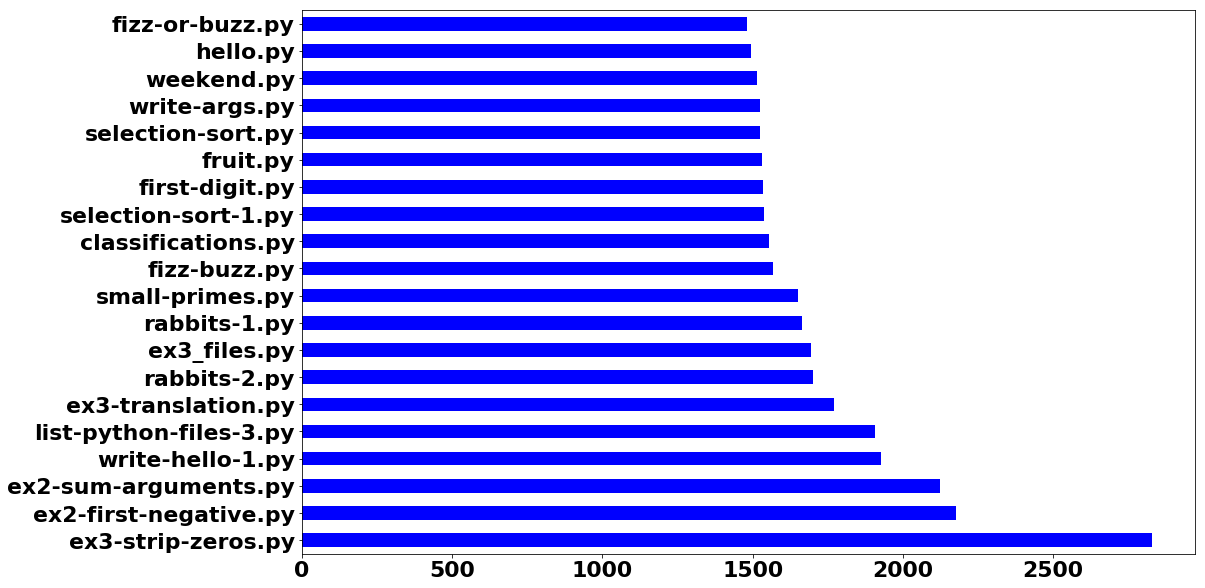

In [10]:
fig = df_programs['task'].value_counts().sort_values(ascending=False)[:20].plot.barh(figsize=(16, 10), color='b')

In [11]:
fig.get_figure().savefig('../../figures/exploring_TASK.png', bbox_inches="tight")

In [12]:
import datetime

def get_dates(col, weeks=4):
    base = df_programs[col].min()
    limit = df_programs[col].max()
    dates = []
    x = base.replace(day=1) # first day of the month
    while x < limit:
        dates.append(x)
        x += datetime.timedelta(weeks=weeks)
    return dates

In [13]:
df_programs['date'] = pd.to_datetime(df_programs['date'])

In [14]:
dates = get_dates('date')

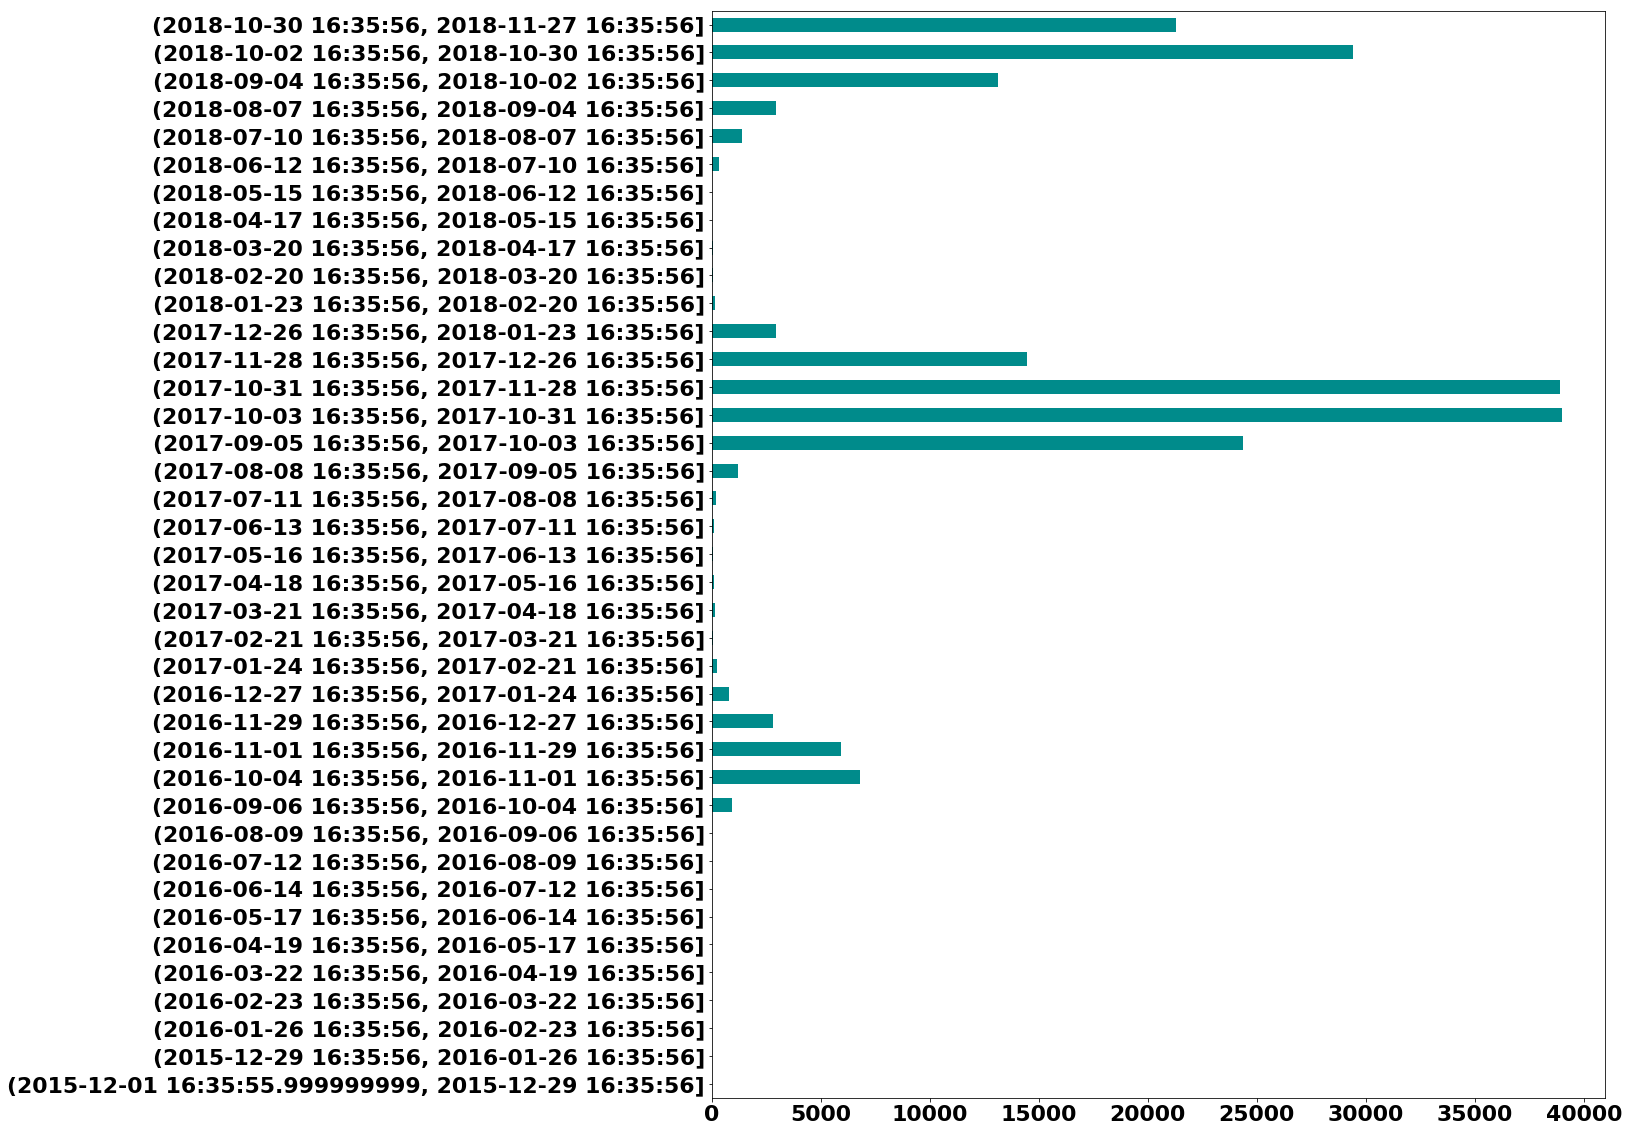

In [15]:
fig = pd.cut(df_programs['date'], bins=dates, include_lowest=True).\
    value_counts(sort=False).plot.barh(rot=0, color="darkcyan", figsize=(16, 20))

In [16]:
fig.get_figure().savefig('../../figures/exploring_Programming_Submission_dates.png', bbox_inches="tight")

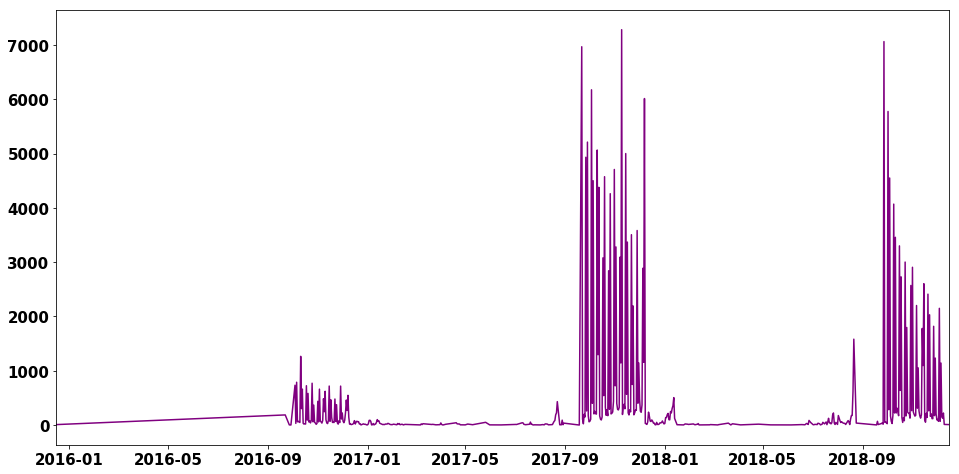

In [17]:
fig = df_programs['date'].dt.date.value_counts().plot(figsize=(16, 8), color='purple', fontsize=15)

In [18]:
fig.get_figure().savefig('../../figures/exploring_Programming_dates.png', bbox_inches="tight")

In [19]:
from datetime import datetime

In [20]:
start = datetime(year=2017, month=9, day=1)
end = datetime(year=2018, month=2, day=1)

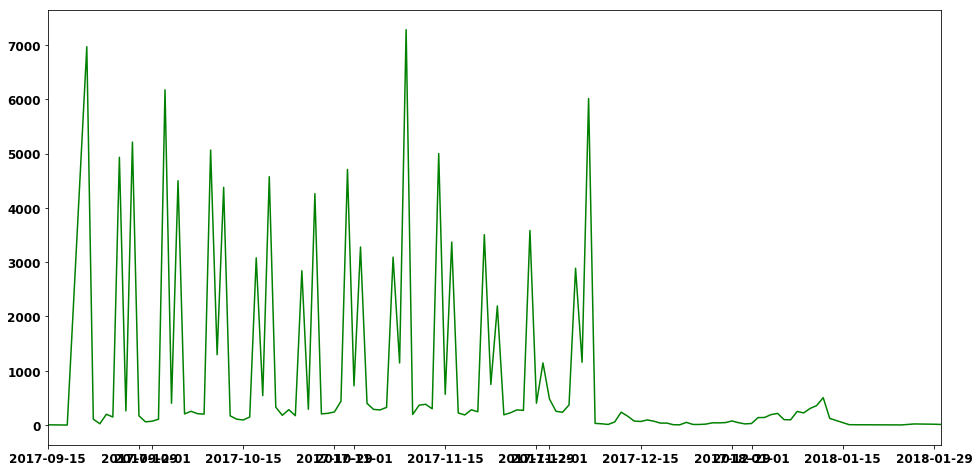

In [21]:
fig = df_programs['date'][
    (df_programs['date'] > start) & 
    (df_programs['date'] < end)].dt.date.value_counts().plot(figsize=(16, 8), color='green', fontsize=12)

In [22]:
fig.get_figure().savefig('../../figures/exploring_Programming_dates_2017_2018.png', bbox_inches="tight")